# Big Data Project: House Prices - Advanced Regression Techniques
Presentazione del progetto di esame dell'a.a. 2021-2022 di Big Data del CLM in Ingegneria Informatica. Il lavoro presentato comprende lo svolgimento della competizione Kaggle __[House Prices - Avanced Regression Techniques]([http://url](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques))__, in cui viene richiesta un'analisi predittiva sul valore di mercato di abitazioni, sulla base di variabili descrittive di una moltitudine di caratteristiche degli immobili che, in diversa misura, ne influiscono sul prezzo.

![banner](./imgs/housesbanner.png)

Il __[dataset](http://jse.amstat.org/v19n3/decock.pdf)__ (De Cock, 2011) a disposizione è un file `csv` contenente informazioni sulle abitazioni della cittadina di __[Ames](https://www.google.com/maps/place/Ames,+IA,+USA/@42.0258192,-93.6964163,12z/data=!3m1!4b1!4m5!3m4!1s0x87ee70624634a06b:0x273156083cc75200!8m2!3d42.0307812!4d-93.6319131)__, nello stato americano dell'Iowa. In compendio al dataset, viene anche fornita una dettagliata __[descrizione](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)__ dei singoli campi:

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

Kaggle mette a disposizione i file `train.csv` e `test.csv`, necessari rispettivamente per l'addestramento del modello predittivo e la valutazione finale (su cui verrà calcolato lo score della competizione), che presentano la stessa struttura eccetto naturalmente per la colonna **SalePrice**, assente in `test.csv`, associata alla variabile target su cui bisognerà effettuare la predizione. 

Quello presentato è un problema di regressione, in cui risulta cruciale anche lo stage di analisi e preparazione dei dati da fornire al modello di apprendimento, in quanto il numero di campi per ogni record/casa è considerevole (79) e la mancata imputazione di dati mancanti e/o errati, così come la scelta di feature non rilevanti ai fini della valutazione del costo, può significativamente impattare l'efficacia dei regressori utilizzati.


## 0. Ambiente di lavoro e tecnologie utilizzate
L'analisi e l'addestramento sono interamente realizzati in Python (v3.8.2) tramite le rispettive API per l'interfacciamento con le tecnologie di Big Data per storage e processing distribuiti. 

In particolare, il framework per l'implementazione dell'architettura Big Data è composto da:
- ``Hadoop Distributed File System`` (HDFS v3.3.0) per la gestione (distribuita) delle repository contenenti i file di input/output ed elaborazione intermedia. **Nota**: il cluster Hadoop, in questo caso, è costituito da un solo nodo, in quanto la dimensione del dataset di lavoro è di poche centinaia di kB (460.68 kB per `train.csv` e 451.41 kB per `test.csv`), che rientra in un solo blocco HDFS, la cui dimensione standard è di 128 MB.
- ``Apache Spark`` (v3.3.0) come engine di data processing distribuito e la relativa API Python `pyspark`, che contiene sia le funzionalità di analisi dei dati secondo la filosofia dei DataFrame (ed RDD) (come nel caso di `pyspark.sql`), sia gli __[algoritmi di machine learning più diffusi](https://spark.apache.org/docs/latest/ml-guide.html)__ (localizzati in `pyspark.ml`).

Analisi ed elaborazioni sul dataset sono in gran parte svolte tramite le funzionalità messe a disposizione da `pyspark`, che gestisce in maniera autonoma l'esecuzione distribuita su cluster e il monitoraggio delle risorse e degli stati di completamento dei job lanciati. In alcuni casi verranno anche sfruttate le funzionalità aggiuntive dei DataFrame `pandas`, che, seppur di natura simile a quella dei DF Spark, presentano una maggior compatibilità con alcuni strumenti di analisi secondari come quelli di visualizzazione (`matplotlib` e `seaborn`). Ciononostante, l'utilizzo di DF `pandas` viene mantenuto fortemente limitato, in quanto il metodo `toPandas()`, che effettua la conversione di DataFrame a partire da Spark, __[sposta lo storage e l'elaborazione in locale](https://stackoverflow.com/questions/29226210/what-is-the-spark-dataframe-method-topandas-actually-doing)__, annullando di fatto la distribuzione e parallelizzazione delle computazioni. In uno scenario reale di Big Data naturalmente ciò è fortemente indesiderato in quanto una singola macchina potrebbe non disporre delle risorse necessarie per gestire internamente un quantitativo di dati che era precedentemente sparso su diversi nodi del cluster. Pertanto, ai fini di rimanere il più fedeli possibile ad una reale, pratica analisi Big Data, `toPandas()` verrà applicato in poche occasioni e solo su sottoinsiemi ristretti (e.g., selezioni, proiezioni, aggregazioni, ecc...) del dataset completo.

Il progetto verrà descritto in dettaglio nel presente notebook Jupyter, utilizzando il markdown per argomentare le scelte effettuate e commentare i risultati ottenuti, e lasciando ai commenti entro le celle di codice Python il chiarimento degli aspetti implementativi.

## 1. Setup dell'ambiente

### 1.1 HDFS
Una volta installato e configurato Hadoop in Windows, i suoi componenti vengono avviati eseguendo il file di scripting DOS `start-dfs.cmd`, che istanzia il FS, il gestore di risorse, così come il namenode e il singolo datanode, tutto in localhost (LAPTOP-MQUB85DE):

![datanode](./imgs/datanode_gui.png)

Sfrutto quindi l'__[API di Kaggle](https://github.com/Kaggle/kaggle-api)__ per recuperare tutti i dati necessari col comando
```bash
 > kaggle competitions download -c house-prices-advanced-regression-techniques
```
e popolo il FS Hadoop con `hdfs dfs -put /local/path/to/data /hdfs/path/` per ottenere una struttura del tipo 

![datapaths](./imgs/datapaths.png)

### 1.2 Spark
Eseguo quindi anche il setup di Spark con l'usuale prologo per reperire il percorso dell'eseguibile e istanziare la `SparkSession`:

In [1]:
import findspark 

location = findspark.find()
findspark.init(location)

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HousePrices - S. Zammuto').getOrCreate()

# visualizzo le informazioni sulla sessione creata
spark.sparkContext

<SparkContext master=local[*] appName=HousePrices - S. Zammuto>

Per completare l'inizializzazione di tutti gli strumenti di lavoro e al fine di centralizzare l'elenco delle API chiamate, eseguo l'`import` di tutte le librerie di cui avrò bisogno nel resto del progetto.

In [2]:
# funzioni di utilità che operano su intere colonne dei DF Spark
from pyspark.sql.functions import col, when, count, isnan, isnull
from pyspark.sql.functions import log, exp, skewness

# tutto il necessario per la creazione ed esecuzione della pipeline di addestramento, assieme alla valutazione del risultato
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import IndexToString
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# pacchetti di visualizzazione
import matplotlib.pyplot as plt
import seaborn as sns

# altro
from math import floor
from pyspark.ml.stat import Correlation

## 2. Data analysis
Questa sezione è dedicata all'analisi del dataset fornito, mirata al data cleaning e alla feature engineering, sulla base di cui sarà successivamente possibile effettuare la selezione finale delle variabili da fornire allo stage di apprendimento.

### 2.1 Analisi eplorativa
Come primo step, sfrutto la `SparkSession` istanziata per leggere il dataset direttamente da HDFS e associare ad esso i rispettivi DataFrame Spark.

In [3]:
# entrambi i csv presentano una riga di header con lo schema completo dei record successivi, 
# per cui la struttura viene ricavata automaticamente settando il parametro inferSchema a True

datasets = {'trainDF': spark.read.csv('hdfs://localhost:9000/bigdata/houseprices/datasets/train.csv', header=True, inferSchema=True),
            'testDF': spark.read.csv('hdfs://localhost:9000/bigdata/houseprices/datasets/test.csv', header=True, inferSchema=True)}

In [4]:
# visualizzo alcuni metadati sul DF per controllare che l'import sia avvenuto per come mi aspetto
datasets['trainDF'].printSchema()
print(f"Numero di righe del training set: {datasets['trainDF'].count()}")

# questo è uno dei pochi casi in cui viene utilizzato il metodo toPandas(), giustificato dalle seguenti motivazioni:
#   - prima della conversione estraggo solo le prime 10 righe del DF con limit(10) in maniera tale da riportare in locale solo
#     una piccola frazione dell'intero dataset;
#   - la visualizzazione del DF pandas comprende una scrollbar orizzontale che risulta più 'pulita' rispetto al df.show() di pyspark, 
#     che, nel caso di un numero esteso di colonne effettua il wrapping dell'output;
datasets['trainDF'].limit(10).toPandas().style.hide(axis='index')

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,W

In [5]:
# ripeto la stessa operazione per il testset
datasets['testDF'].printSchema()
print(f"Numero di righe del test set: {datasets['testDF'].count()}")
datasets['testDF'].limit(10).toPandas().style.hide(axis='index')

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,NA,NA,NA,0,6,2010,WD,Normal
1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,NA,NA,NA,0,1,2010,WD,Normal
1466,60,RL,75,10000,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,763,763,GasA,Gd,Y,SBrkr,763,892,0,1655,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993,Fin,2,440,TA,TA,Y,157,84,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal
1467,20,RL,NA,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63,8402,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,789,789,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,NA,NA,NA,0,5,2010,WD,Normal
1469,20,RL,85,10176,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,Gd,GLQ,637,Unf,0,663,1300,GasA,Gd,Y,SBrkr,1341,0,0,1341,1,0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990,Unf,2,506,TA,TA,Y,192,0,0,0,0,0,NA,NA,NA,0,2,2010,WD,Normal
1470,20,RL,70,8400,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,NA,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,NA,MnPrv,NA,0,4,2010,WD,Normal


#### 2.1.1 Variabili numeriche e categoriche
Come è possibile vedere dall'output di `printSchema()`, tutti i vari campi sono `nullable`, con tipo di dato inferito `string` o `integer`. Ciò significa che il dataset può contenere valori nulli e che sono presenti sia variabili categoriche che numeriche, le quali dovranno essere gestite separatamente.

Una prima stima sulla separazione tra le due tipologie di variabili può essere svolta controllando il `dtype` inferito da Spark per `trainDF`:

In [6]:
init_cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
print(f"Stima iniziale del numero di variabili categoriche: {len(init_cat_vars_est)}\n {init_cat_vars_est}")

Stima iniziale del numero di variabili categoriche: 46
 ['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [7]:
# il set delle varaibili numeriche è il complementare di quelle categoriche, eccetto per il campo 'Id' che, seppur numerico, non
# fornisce informazioni aggiuntive sui record
init_num_vars_est = [var for var in datasets['trainDF'].columns if var not in init_cat_vars_est and var != 'Id']
print(f"Stima iniziale del numero di variabili numeriche: {len(init_num_vars_est)}\n {init_num_vars_est}")

Stima iniziale del numero di variabili numeriche: 34
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Per quanto la deduzione automatica dei tipi dia una prospettiva generale sulla distribuzione delle tipologie di dato, la cross-reference con le informazioni fornite dalla piattaforma Kaggle* suggerisce la presenza di alcune inesattezze nella stima effettuata. Ne sono un esempio i campi **LotFrontage**, **MasVnrArea** e **GarageYrBuilt**** di `trainDF` che, seppur inseriti in `init_cat_vars_est`, sono in realtà variabili numeriche, e sono state parsate come stringhe in quanto le istanze di dati (numerici) mancanti, in questo dataset, sono codificate con `NA`, che, non essendo una keyword Python (come invece è `None`), viene interpretata come stringa.

Lo stesso discorso, in `testDF`, isola le feature **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtFullBath**, **BsmtHalfBath**, **GarageCars**, **GarageArea**.

Sulla base di queste considerazioni è possibile riportare le colonne in questione al tipo corretto.

*Ad esempio, è immediato riconoscere una feature numerica se il suo nome presenta il suffisso **\[...\]Area** o **\[...\]SF** (Square Feet).<br/>
**Nonostante non ci sia una chiara separazione tra l'interpretazione delle variabili 'anno' in termini numerici
o categorici, risulterà più conveniente trattarle come numeriche.

In [8]:
cat_to_num_vars_train = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_to_num_vars_test = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                            'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

cat_to_num_vars = cat_to_num_vars_train + cat_to_num_vars_test

# effettuo la conversione categorico -> numerico  per ogni variabile cat_to_num_vars
for name in datasets.keys():
    for var in cat_to_num_vars:

        # sostituisco nelle colonne interessate le istanze di 'NA' con None
        datasets[name] = datasets[name].withColumn(var, \
                                                when(datasets[name][var] == 'NA', None).\
                                                otherwise(datasets[name][var]))

        # una volta che le stringhe sono state rimosse, eseguo il cast della colonna ad un tipo numerico (dato che non so se effettivamente
        # tutti i valori non nulli sono interi, scelgo il cast a double per essere sicuro di evitare troncamenti)
        datasets[name] = datasets[name].withColumn(var, col(var).cast('double'))

Di contro, è possibile notare anche che variabili numeriche che codificano una suddivisione in classi sono in realtà categoriche, come nel caso di MSSubClass, la cui descrizione in `data_description.txt` è:
```
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
```

In [9]:
# eseguo direttamente il cast a string e non tengo conto dei 'NA' in quanto:
#   - dalla documentazione Kaggle, non sono presenti valori nulli (eplicitamente codificati) nella colonna MSSubClass;
#   - l'eventuale presenza di valori None verrà gestita dalle successive procedure di imputazione dei valori nulli.
for name in datasets.keys():
    datasets[name] = datasets[name].withColumn('MSSubClass', col('MSSubClass').cast('string'))

Adesso sono sicuro che sia `trainDF` che `testDF` hanno lo stesso schema e le stesse tipologie di variabili, sempre a meno del target **SalePrice**.

In [10]:
# sistemo la lista della stima iniziale attraverso il DF trasformato
cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
num_vars_est = [var for var in datasets['trainDF'].columns if var not in cat_vars_est and var != 'Id']

print(f"Nuova stima del numero delle variabili categoriche di trainDF: {len(cat_vars_est)}\n {cat_vars_est}")
print(f"\nNuova stima del numero di variabili numeriche di trainDF: {len(num_vars_est)}\n {num_vars_est}")

Nuova stima del numero delle variabili categoriche di trainDF: 44
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Nuova stima del numero di variabili numeriche di trainDF: 36
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbv

In [11]:
# controllo la corrispondenza con i tipi del testset
cat_vars_est_t = [item[0] for item in datasets['testDF'].dtypes if item[1].startswith('string')]
num_vars_est_t = [var for var in datasets['testDF'].columns if var not in cat_vars_est and var != 'Id']

print(f"Nuova stima del numero delle variabili categoriche di testDF: {len(cat_vars_est_t)}\n {cat_vars_est_t}")
print(f"\nNuova stima del numero di variabili numeriche di testDF: {len(num_vars_est_t)}\n {num_vars_est_t}")

Nuova stima del numero delle variabili categoriche di testDF: 44
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Nuova stima del numero di variabili numeriche di testDF: 35
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr

Bisognerà anche tenere conto che, nelle variabili effettivamente categoriche, `NA` non sempre equivale a `None`, dato che per alcune di esse è da interpretare come 'assenza (nell'abitazione) della caratteristica da categorizzare' e non come 'dato mancante', come anche viene esplicitato in `data_description.txt`, in cui ad esempio `NA` in **Fence** ha significato di 'staccionata non presente':

```
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
```

#### 2.1.2 Analisi del target **SalePrice**
**SalePrice** è la variabile target del nostro task di predizione, quella a cui farà riferimento il modello regressore nelle fasi di addestramento sul trainset e fitting sul testset. In qualità di variabile (numerica) singola, è possibile studiarne il comportamento plottandone la distribuzione sui valori di `trainDF`.

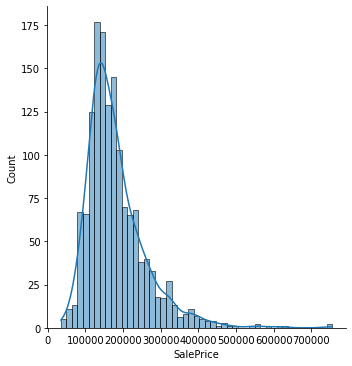

In [21]:
# estraggo i valori della colonna SalePrice e li memeorizzo in una lista, che poi verrà passata al tool di visualizzazione
sale_prices = [row['SalePrice'] 
        for row in datasets['trainDF'].select('SalePrice').collect()]

# plotto i dati recuperati sulla displot di seaborn, settando 
# il parametro kde=True per visualizzare anche l'andamento della distribuzione
sns.displot(sale_prices, kde=True)
plt.xlabel("SalePrice");

La stima della distribuzione di **SalePrice** è stata calcolata tramite una __[Kernel Density Estimate (KDE)](https://mathisonian.github.io/kde/)__, espressa come 

$$ \hat{f}(x) = \sum_{observations} K\left( \displaystyle\frac{x - observation}{bandwidth}\right)$$

in cui *bandwidth* è la deviazione standard dello smoothing kernel $K$, gaussiano nel caso della KDE di `seaborn`. Possiamo sfruttare la *bandwidth* default dell'algoritmo in quanto sappiamo che si comporta bene in casi in cui la distribuzione reale è __[smooth, unimodale e approssimativamente a forma di campana](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)__, come nel nostro caso.

Graficamente, si può notare che la distribuzione di **SalePrice** presenta una skewness non trascurabile, equivalente a:

In [22]:
print(f"Skewness di SalePrice: {datasets['trainDF'].select(skewness('SalePrice')).collect()[0][0]}")

Skewness di SalePrice: 1.8809407460340333


che si può ridurre effettuando una __[Log-transformation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/)__ sulla distribuzione di partenza. Questa operazione risulta quasi necessaria nel nostro caso, in quanto buona parte dei modelli di regressione lavorano sull'ipotesi che la variabile dipendente sia distribuita in maniera normale, e __[la presenza di skewness nei dati potrebbe propagarsi nella distribuzione degli errori](https://stats.stackexchange.com/questions/299154/the-benefit-of-unskewing-skewed-data)__, alterando lo stage di **evaluation** del regressore.

In [24]:
datasets['trainDF'] = datasets['trainDF'].withColumn('SalePrice', log(col('SalePrice')))

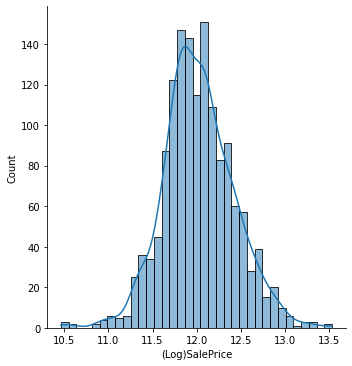

In [25]:
# come prima, estraggo la colonna (trasformata) e la visualizzo
unskewed_prices = [row['SalePrice'] 
        for row in datasets['trainDF'].select('SalePrice').collect()]

sns.displot(unskewed_prices, kde=True)
plt.xlabel("(Log)SalePrice");

Il risultato ottenuto è quello desiderato, in cui abbiamo mantenuto le dipendenze di **SalePrice** su una distribuzione più vicina ad una normale, in cui la skewness è significativamente ridotta:

In [27]:
print(f"Skewness di (Log)SalePrice: {datasets['trainDF'].select(skewness('SalePrice')).collect()[0][0]}")

Skewness di (Log)SalePrice: 0.12121036730136245


### 2.2 Correlazione delle feature numeriche
Ai fini della feature selection rispetto ai dati numerici, può tornare utile estrarre solo quelle variabili che influiscono maggiormente sui valori di **SalePrice**. In questi termini, un valore 'alto' di una metrica di correlazione statistica può essere manifestazione di una forte dipendenza delle feature numeriche con il target. In particolare, verrà sfruttata la __[correlazione di Spearman](https://www.jstor.org/stable/1412159?origin=crossref&seq=1)__ per la sua caratteristica di miglior rilevazione di correlazioni nonlineari rispetto alla tradizionale __[correlazione di Pearson](https://royalsocietypublishing.org/doi/10.1098/rspl.1895.0041)__.

Nello specifico, il coefficiente di correlazione di Spearman $r_s$ è definita sul coefficiente di Pearson $\rho_{R(X),R(Y)}$ tra i ranghi $R(X), R(Y)$ delle variabili di input $X,Y$:

$$ r_s = \rho_{R(X),R(Y)} = \frac{cov(R(X),R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}} $$

Su questa espressione si basa il metodo `corr()` parametrizzato con metodologia `spearman` della classe `Correlation` del modulo `pyspark.ml.stat`, che useremo per generare e visualizzare la matrice di correlazione completa sulle variabili numeriche.

In [28]:
# il metodo corr() necessita di colonne di input di tipo Vector, che generiamo con pyspark.ml.feature.VectorAssempler
vector_col = 'corr_features'
assembler = VectorAssembler(inputCols=num_vars_est, outputCol='corr_features')
df_vector = assembler.transform(datasets['trainDF'].dropna(how="any", subset=num_vars_est)).select(vector_col)

# correlazione di spearman, che funziona meglio per le correlazioni nonlineari
corr_matrix = Correlation.corr(df_vector, vector_col, method='spearman').collect()[0][0].toArray().tolist()

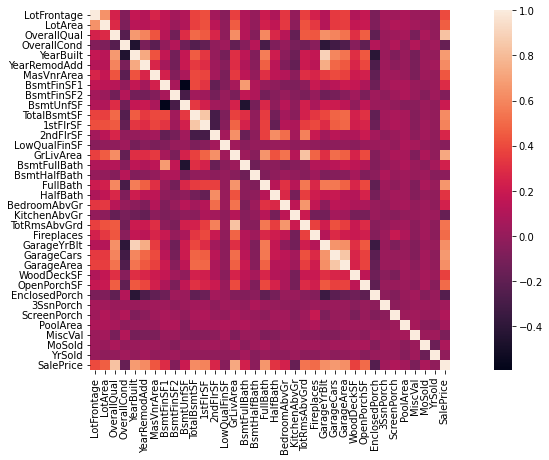

In [30]:
# visualizzo la heatmap sulle correlazioni calcolate: più chiaro il gradiente di colore, 
# maggiore il parametro di correlazione tra le variabili
sns.heatmap(corr_matrix, xticklabels=num_vars_est, yticklabels=num_vars_est, square=True);

### ?? Gestione dei valori mancanti
Una volta codificati i valori nulli con `None`, è possibile sfruttare a pieno i metodi di `pyspark` per la rilevazione di dati mancanti. In particolare, nel caso in cui un campo abbia un alto quantitativo di nulli (relativamente al totale), la strategia sarà quella di effettuare il drop diretto della colonna. Se invece i dati assenti sono in numero ristretto, il drop dell'intera colonna potrebbe causare la perdita di informazioni di significato ai fini della predizione finale del prezzo dell'abitazione; segue che, in questo caso, sarà necessarià un'analisi più approfondita per riempire i nulli con valori dedotti sul resto del dataset.

In [17]:
# implemento il comportamento di pandas.DataFrame.isnull

# UDF per sostituire True e False nelle istanze di valori nulli, NA e None
def is_null(df):
    return df.select([(isnan(col(column)) | isnull(col(column))) for column in df.columns])

# creo un nuovo DF per ogni dataset tramite il metodo transform con la UDF definita;
# quindi riporto i nomi dei campi all'originale
nullDS = {name: datasets[name].transform(is_null).toDF(*datasets[name].columns) for name in datasets.keys()}

In [18]:
# conto i valori nulli di ogni colonna ed estraggo i campi in cui c'è almeno 1 valore nullo
def count_nulls(df):
    has_null = []
    for column in df.columns:
        null_count = df.where(col(column) | col(column).isNull()).count()
        if null_count > 0:
            has_null.append((column, null_count))
    return has_null

# istanzio i rispettivi DataFrame in cui memorizzare il conteggio dei nulli
nullCountDS = {}
for name, df in nullDS.items():
    
    nullCountDS[name] = spark.createDataFrame(count_nulls(df), ['columnWithNulls', 'nullCount'])

    # aggiungo una colonna per visualizzare la percentuale dei nulli sul totale
    nullCountDS[name] = nullCountDS[name].withColumn("percentage", col('nullCount')/df.count())

In [19]:
nullCountDS['trainDF'].show()

+---------------+---------+--------------------+
|columnWithNulls|nullCount|          percentage|
+---------------+---------+--------------------+
|    LotFrontage|      259|  0.1773972602739726|
|     MasVnrArea|        8|0.005479452054794521|
|    GarageYrBlt|       81| 0.05547945205479452|
+---------------+---------+--------------------+



In [20]:
nullCountDS['testDF'].show()

+---------------+---------+--------------------+
|columnWithNulls|nullCount|          percentage|
+---------------+---------+--------------------+
|    LotFrontage|      227| 0.15558601782042494|
|     MasVnrArea|       15| 0.01028101439342015|
|     BsmtFinSF1|        1|6.854009595613434E-4|
|     BsmtFinSF2|        1|6.854009595613434E-4|
|      BsmtUnfSF|        1|6.854009595613434E-4|
|    TotalBsmtSF|        1|6.854009595613434E-4|
|   BsmtFullBath|        2|0.001370801919122...|
|   BsmtHalfBath|        2|0.001370801919122...|
|    GarageYrBlt|       78|0.053461274845784786|
|     GarageCars|        1|6.854009595613434E-4|
|     GarageArea|        1|6.854009595613434E-4|
+---------------+---------+--------------------+



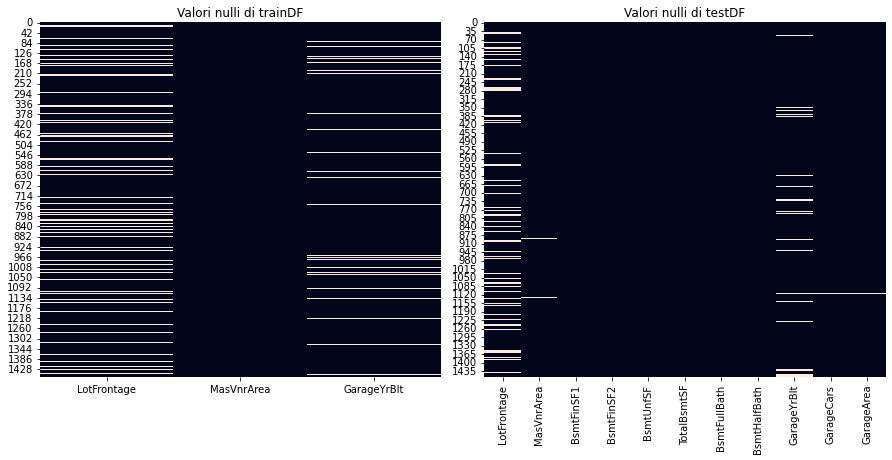

In [16]:
plt.rcParams["figure.figsize"] = [12.50, 6.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(ncols=2)

for idx, ds in enumerate(nullDS.items()):

    # estraggo le colonne con valori nulli dai DF di nullCountDS
    null_fields_list = [row['columnWithNulls'] for row in nullCountDS[ds[0]].select('columnWithNulls').collect()]

    # creo la heatmap sulla select delle colonne null_fields_list
    sns.heatmap(ds[1].select(*null_fields_list).collect(), ax=axes[idx], xticklabels=null_fields_list, cbar=False)
    axes[idx].set_title(f"Valori nulli di {ds[0]}")

plt.show()

Dalle analisi svolte è possibile notare che sia `trainDF` che `testDF` presentano pochi valori mancanti e solo su variabili numeriche (ad esempio, le colonne con nulli in `trainDF` sono tutte e solo quelle che precedentemente hanno subito la conversione a tipo numerico). L'imputazione dei suddetti dati mancanti richiederà quindi ulteriori considerazioni.

prima num, poi na, poi utilities (sulla filosofia dei na)

(feature engineering)

In aggiunta, alcune variabili qualitative __[possono essere interpretate come ordinali categoriche](https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/)__ nel caso in cui le categorie in questione abbiano un qualche tipo di ordinamento ben definito. Le feature in questione sono ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC.

Gestire Neighborhood.